In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

df_temp = pd.read_csv("csvs\measures_v2.csv")
df_body = pd.read_csv("csvs/bodyPerformance.csv")

df_body.head()

<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Chris\AppData\Local\Temp\ipykernel_17400\3269998259.py:7: SyntaxWarning: invalid escape sequence '\m'
  df_temp = pd.read_csv("csvs\measures_v2.csv")


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [2]:
df_temp.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17


In [4]:
df_temp.drop(index=range(1230816), inplace=True)
#dropping columns because it takes a long time to train the model

In [4]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 1230816 to 1330815
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   u_q             100000 non-null  float64
 1   coolant         100000 non-null  float64
 2   stator_winding  100000 non-null  float64
 3   u_d             100000 non-null  float64
 4   stator_tooth    100000 non-null  float64
 5   motor_speed     100000 non-null  float64
 6   i_d             100000 non-null  float64
 7   i_q             100000 non-null  float64
 8   pm              100000 non-null  float64
 9   stator_yoke     100000 non-null  float64
 10  ambient         100000 non-null  float64
 11  torque          100000 non-null  float64
 12  profile_id      100000 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 9.9 MB


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for column in df_body.select_dtypes(include=["object"]).columns:
    df_body[column] = le.fit_transform(df_body[column])


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_temp = df_temp.drop(columns=["pm"])
y_temp = df_temp["pm"]

X_body = df_body.drop(columns=["class"])
y_body = df_body["class"]

X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42)
X_train_body, X_test_body, y_train_body, y_test_body = train_test_split(X_body, y_body, test_size=0.3, random_state=42)

## KNN Clasifier and Regressor

Text(0, 0.5, 'Mean Squared Error')

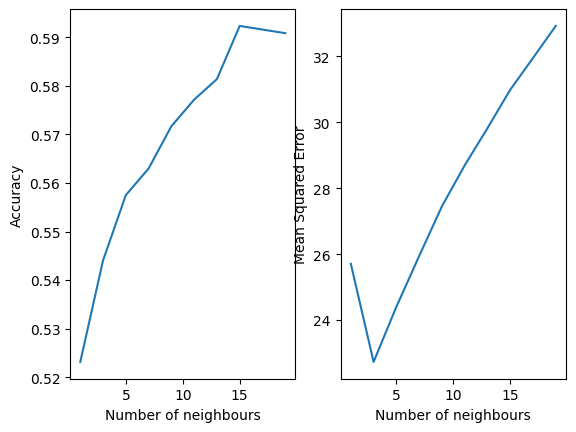

In [7]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

fig, ax = plt.subplots(1, 2)

n_neighbours = range(1, 20, 2)
acc = []
mse = []

for n in n_neighbours:
    KNC = KNeighborsClassifier(n_neighbors=n)
    KNC.fit(X_train_body, y_train_body)
    acc.append(accuracy_score(y_test_body, KNC.predict(X_test_body)))

    KNR = KNeighborsRegressor(n_neighbors=n)
    KNR.fit(X_train_temp, y_train_temp)
    mse.append(mean_squared_error(y_test_temp, KNR.predict(X_test_temp)))

ax[0].plot(n_neighbours, acc)
ax[0].set_xlabel("Number of neighbours")
ax[0].set_ylabel("Accuracy")
ax[1].plot(n_neighbours, mse)
ax[1].set_xlabel("Number of neighbours")
ax[1].set_ylabel("Mean Squared Error")

We can see that the bigger the number of neighbours, the bigger the error in both cases, although its not a big difference

## Decision Tree Clasifier (Gini)

Text(50.722222222222214, 0.5, 'Max Depth')

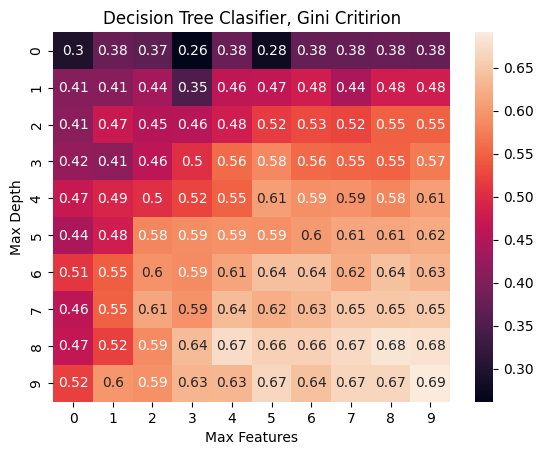

In [8]:
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

max_depth_values = list(range(1, 11))
max_fetures_values = list(range(1, len(df_body.columns)-1))
accuracy_matrix = np.zeros((len(max_depth_values), len(max_fetures_values)))

for i, max_depth in enumerate(max_depth_values):
    for j, max_fetures in enumerate(max_fetures_values):
        dt_classifier = DecisionTreeClassifier(criterion="gini", max_depth=max_depth, max_features=max_fetures)
        dt_classifier.fit(X_train_body, y_train_body)
        accuracy_matrix[i, j] = accuracy_score(y_test_body, dt_classifier.predict(X_test_body))

sns.heatmap(data=accuracy_matrix, annot=True)
plt.title("Decision Tree Clasifier, Gini Critirion")
plt.xlabel("Max Features")
plt.ylabel("Max Depth")

## Decision Tree Clasifier (Entropy)

Text(50.722222222222214, 0.5, 'Max Depth')

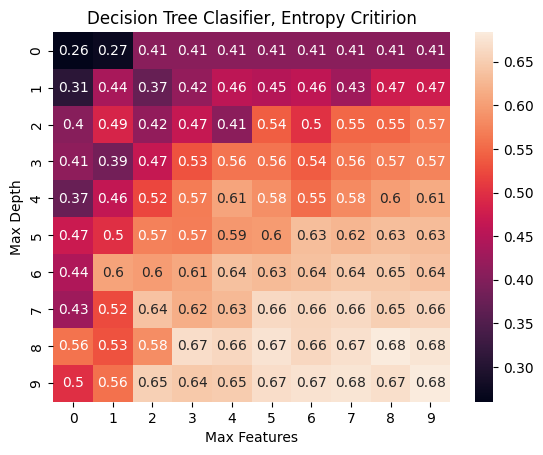

In [9]:
max_depth_values = list(range(1, 11))
max_fetures_values = list(range(1, len(df_body.columns)-1))
accuracy_matrix = np.zeros((len(max_depth_values), len(max_fetures_values)))

for i, max_depth in enumerate(max_depth_values):
    for j, max_fetures in enumerate(max_fetures_values):
        dt_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth, max_features=max_fetures)
        dt_classifier.fit(X_train_body, y_train_body)
        accuracy_matrix[i, j] = accuracy_score(y_test_body, dt_classifier.predict(X_test_body))

sns.heatmap(data=accuracy_matrix, annot=True)
plt.title("Decision Tree Clasifier, Entropy Critirion")
plt.xlabel("Max Features")
plt.ylabel("Max Depth")

Comparing the 2 graphs we see that they are pretty similar, and the trend is that the bigger the number for max_depth and max_features, the bigger the accuracy, but if done too much, it can lead to over fitting

## Decision Tree Regressor (Friedman MSE)


Text(50.722222222222214, 0.5, 'Max Depth')

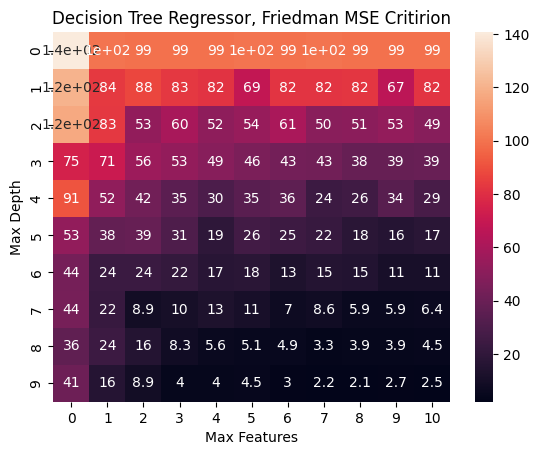

In [10]:
from sklearn.tree import DecisionTreeRegressor

max_depth_values = list(range(1, 11))
max_fetures_values = list(range(1, len(df_temp.columns)-1))
mse_matrix = np.zeros((len(max_depth_values), len(max_fetures_values)))

for i, max_depth in enumerate(max_depth_values):
    for j, max_fetures in enumerate(max_fetures_values):
        dt_regressor = DecisionTreeRegressor(criterion="friedman_mse", max_depth=max_depth, max_features=max_fetures)
        dt_regressor.fit(X_train_temp, y_train_temp)
        mse_matrix[i, j] = mean_squared_error(y_test_temp, dt_regressor.predict(X_test_temp))

sns.heatmap(data=mse_matrix, annot=True)
plt.title("Decision Tree Regressor, Friedman MSE Critirion")
plt.xlabel("Max Features")
plt.ylabel("Max Depth")

The **criterion** function to measure the quality of a split. Supported criteria are **“squared_error”** for the mean squared error, which is equal to variance reduction as feature selection criterion and minimizes the L2 loss using the mean of each terminal node, **“friedman_mse”**, which uses mean squared error with Friedman’s improvement score for potential splits, **“absolute_error”** for the mean absolute error, which minimizes the L1 loss using the median of each terminal node, and **“poisson”** which uses reduction in the half mean Poisson deviance to find splits.

## Decision Tree Regressor (Poisson)

Text(50.722222222222214, 0.5, 'Max Depth')

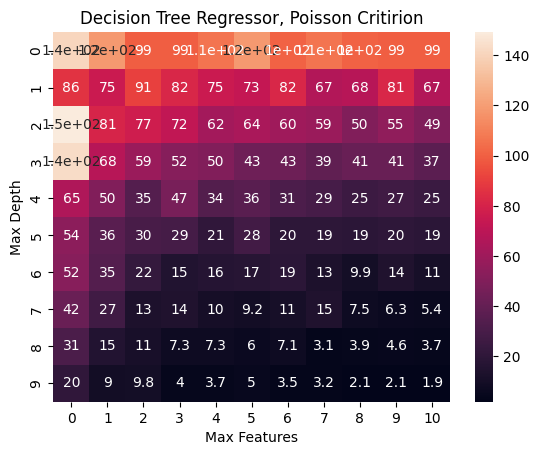

In [11]:
max_depth_values = list(range(1, 11))
max_fetures_values = list(range(1, len(df_temp.columns)-1))
mse_matrix = np.zeros((len(max_depth_values), len(max_fetures_values)))

for i, max_depth in enumerate(max_depth_values):
    for j, max_fetures in enumerate(max_fetures_values):
        dt_regressor = DecisionTreeRegressor(criterion="poisson", max_depth=max_depth, max_features=max_fetures)
        dt_regressor.fit(X_train_temp, y_train_temp)
        mse_matrix[i, j] = mean_squared_error(y_test_temp, dt_regressor.predict(X_test_temp))

sns.heatmap(data=mse_matrix, annot=True)
plt.title("Decision Tree Regressor, Poisson Critirion")
plt.xlabel("Max Features")
plt.ylabel("Max Depth")

Here we also see that the 2 graphs are pretty similar, meaning there isnt a big difference between the mse friedman and poisson critirions, in terms of practicality. Also we see that the bigger the value for the parametres, the smaller the error.

## Random Forest Classifier

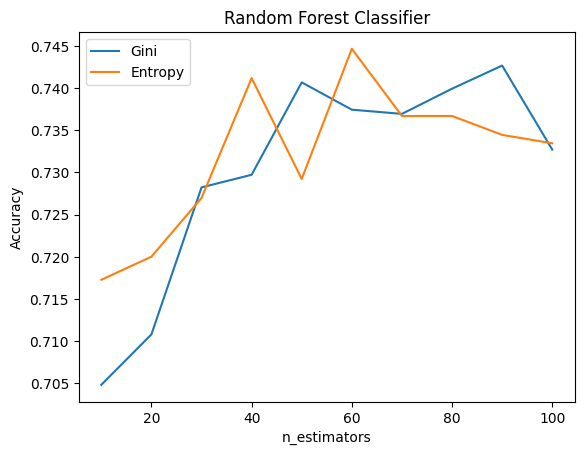

In [12]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = list(range(10, 101, 10))
acc_gini = []
acc_entropy = []

for n in n_estimators:
    rf_gini = RandomForestClassifier(criterion="gini", n_estimators=n)
    rf_entropy = RandomForestClassifier(criterion="entropy", n_estimators=n)

    rf_gini.fit(X_train_body, y_train_body)
    rf_entropy.fit(X_train_body, y_train_body)

    acc_gini.append(accuracy_score(y_test_body, rf_gini.predict(X_test_body)))
    acc_entropy.append(accuracy_score(y_test_body, rf_entropy.predict(X_test_body)))

plt.plot(n_estimators, acc_gini, label = "Gini")
plt.plot(n_estimators, acc_entropy, label = "Entropy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("Random Forest Classifier")
plt.legend()

We can see that both are about the same, and for both models, they reach peak accuracy at around 80 total trees

## Random Forest Regressor 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

n_estimators = list(range(10, 51, 10))
acc_squared_error = []
acc_absolute_error = []
acc_poisson = []



for n in n_estimators:
    rf_se = RandomForestRegressor(criterion="squared_error", n_estimators=n)
    rf_ae = RandomForestRegressor(criterion="absolute_error", n_estimators=n)
    rf_p = RandomForestRegressor(criterion="poisson", n_estimators=n)

    rf_se.fit(X_train_temp, y_train_temp)
    rf_ae.fit(X_train_temp, y_train_temp)
    rf_p.fit(X_train_temp, y_train_temp)

    acc_squared_error.append(mean_squared_error(y_test_temp, rf_se.predict(X_test_temp)))
    acc_absolute_error.append(mean_squared_error(y_test_temp, rf_ae.predict(X_test_temp)))
    acc_poisson.append(mean_squared_error(y_test_temp, rf_p.predict(X_test_temp)))

plt.plot(n_estimators, acc_squared_error, label = "Squared Error")
plt.plot(n_estimators, acc_absolute_error, label = "Absolute Error")
plt.plot(n_estimators, acc_poisson, label = "Poisson")


plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("Random Forest Regressor")
plt.legend()

## SVC


Text(0.5, 1.0, 'SVC Accuracy')

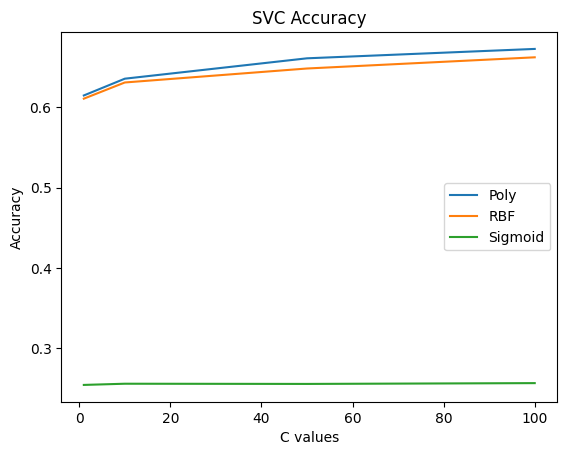

In [8]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

kernels = ["poly", "rbf", "sigmoid"]
c_values = [1, 10, 50, 100]

acc_poly = []
acc_rbf = []
acc_sig = []

for kernel in kernels:
    for value in c_values:
        clf = SVC(kernel = kernel, C=value)
        clf.fit(X_train_body, y_train_body)

        acc = accuracy_score(y_test_body, clf.predict(X_test_body))

        if kernel == "poly":
            acc_poly.append(acc)
        elif kernel == "rbf":
            acc_rbf.append(acc)
        if kernel == "sigmoid":
            acc_sig.append(acc)

plt.plot(c_values, acc_poly, label = "Poly")
plt.plot(c_values, acc_rbf, label = "RBF")
plt.plot(c_values, acc_sig, label = "Sigmoid")
plt.legend()
plt.xlabel("C values")
plt.ylabel("Accuracy")
plt.title("SVC Accuracy")

We can see that roughly Poly and RBF kernels have similar performance, but the sigmoid kernel is very far off

## SVR

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

kernels = ["poly", "rbf", "sigmoid"]
c_values = [1, 20, 50, 100]

acc_poly = []
acc_rbf = []
acc_sig = []

for kernel in kernels:
    for value in c_values:
        reg = SVR(kernel = kernel, C=value)
        reg.fit(X_train_temp, y_train_temp)

        acc = mean_squared_error(y_test_temp, reg.predict(X_test_temp))

        if kernel == "poly":
            acc_poly.append(acc)
        elif kernel == "rbf":
            acc_rbf.append(acc)
        if kernel == "sigmoid":
            acc_sig.append(acc)

plt.plot(c_values, acc_poly, label = "Poly")
plt.plot(c_values, acc_rbf, label = "RBF")
plt.plot(c_values, acc_sig, label = "Sigmoid")
plt.legend()
plt.xlabel("C values")
plt.ylabel("Accuracy")
plt.title("SVC Accuracy")